In [ ]:
# 🏥 Nursing Home Medicare & Medicaid Dataset Analysis

# This project analyzes nursing home data from Medicare.gov to identify patterns in facility deficiencies, penalties, and ownership types. We'll use Python and machine learning to predict which facilities are most likely to receive penalties based on their performance metrics.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
def_df = pd.read_csv("C:/Users/Michael Lam/Desktop/Nursing_Home_Project/deficiencies.csv", encoding='latin1', low_memory=False)
owner_df = pd.read_csv("C:/Users/Michael Lam/Desktop/Nursing_Home_Project/ownership.csv", encoding='latin1', low_memory=False)
penalty_df = pd.read_csv("C:/Users/Michael Lam/Desktop/Nursing_Home_Project/penalties.csv", encoding='latin1', low_memory=False)
provider_df = pd.read_csv("C:/Users/Michael Lam/Desktop/Nursing_Home_Project/provider_info.csv", encoding='latin1', low_memory=False)
quality_claims_df = pd.read_csv("C:/Users/Michael Lam/Desktop/Nursing_Home_Project/quality_msr_claims.csv", encoding='latin1', low_memory=False)




In [44]:
# Remove trailing spaces from column names
for df in [def_df, owner_df, penalty_df, provider_df, quality_claims_df]:
    df.columns = df.columns.str.strip()

In [45]:
## 🧹 Data Cleaning

# We standardize column names and check for missing values or inconsistencies across dataframes.


In [46]:
# Merge Data (Code)

In [47]:
print(provider_df.columns)
print(penalty_df.columns)
print(def_df.columns)
print(quality_msr_mds_df.columns)


Index(['provnum', 'PROVNAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'PHONE',
       'COUNTY_SSA', 'COUNTY_NAME', 'OWNERSHIP', 'BEDCERT', 'RESTOT',
       'CERTIFICATION', 'INHOSP', 'LBN', 'PARTICIPATION_DATE', 'CCRC_FACIL',
       'SFF', 'OLDSURVEY', 'CHOW_LAST_12MOS', 'resfamcouncil',
       'sprinkler_status', 'overall_rating', 'overall_rating_fn',
       'survey_rating', 'survey_rating_fn', 'quality_rating',
       'quality_rating_fn', 'staffing_rating', 'staffing_rating_fn',
       'RN_staffing_rating', 'rn_staffing_rating_fn', 'STAFFING_FLAG',
       'PT_STAFFING_FLAG', 'AIDHRD', 'VOCHRD', 'RNHRD', 'TOTLICHRD', 'TOTHRD',
       'PTHRD', 'exp_aide', 'exp_lpn', 'exp_rn', 'exp_total', 'adj_aide',
       'adj_lpn', 'adj_rn', 'adj_total', 'cycle_1_defs', 'cycle_1_nfromdefs',
       'cycle_1_nfromcomp', 'cycle_1_defs_score', 'CYCLE_1_SURVEY_DATE',
       'CYCLE_1_NUMREVIS', 'CYCLE_1_REVISIT_SCORE', 'CYCLE_1_TOTAL_SCORE',
       'cycle_2_defs', 'cycle_2_nfromdefs', 'cycle_2_nfromcomp',
    

In [48]:
# First, make sure all column names are stripped of spaces
provider_df.columns = provider_df.columns.str.strip()
penalty_df.columns = penalty_df.columns.str.strip()
def_df.columns = def_df.columns.str.strip()

# Optional: convert 'provnum' to string for consistent merging (especially if merging with other datasets later)
provider_df['provnum'] = provider_df['provnum'].astype(str)
penalty_df['provnum'] = penalty_df['provnum'].astype(str)
def_df['provnum'] = def_df['provnum'].astype(str)

# Merge penalty and deficiencies into provider_df
merged_df = provider_df.merge(penalty_df, on='provnum', how='left')
merged_df = merged_df.merge(
    def_df.groupby('provnum').size().reset_index(name='deficiency_count'),
    on='provnum',
    how='left'
)

# Only run this after you properly define and load quality_msr_mds_df
# Example: quality_msr_mds_df = pd.read_csv('quality_msr_mds.csv')
# merged_df = merged_df.merge(quality_msr_mds_df, on='provnum', how='left')

# Fill NaN deficiency counts with 0
merged_df['deficiency_count'] = merged_df['deficiency_count'].fillna(0)


In [49]:
quality_msr_mds_df.rename(columns={'PROVNUM': 'provnum'}, inplace=True)


In [50]:
merged_df = merged_df.merge(quality_msr_mds_df, on='provnum', how='left')


In [51]:
# Standardize column names and types
for df in [provider_df, penalty_df, def_df, quality_msr_mds_df]:
    df.columns = df.columns.str.strip()
    if 'provnum' in df.columns:
        df['provnum'] = df['provnum'].astype(str)

# Merge datasets using 'provnum'
merged_df = provider_df.merge(penalty_df, on='provnum', how='left')
merged_df = merged_df.merge(
    def_df.groupby('provnum').size().reset_index(name='deficiency_count'),
    on='provnum',
    how='left'
)
merged_df = merged_df.merge(quality_msr_mds_df, on='provnum', how='left')
merged_df['deficiency_count'] = merged_df['deficiency_count'].fillna(0)




In [52]:
print(quality_msr_mds_df.columns.tolist())


['provnum', 'PROVNAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'MSR_CD', 'MSR_DESCR', 'STAY_TYPE', 'Q1_MEASURE_SCORE', 'Q1_MEASURE_FN', 'Q2_MEASURE_SCORE', 'Q2_MEASURE_FN', 'Q3_MEASURE_SCORE', 'Q3_MEASURE_FN', 'Q4_MEASURE_SCORE', 'Q4_MEASURE_FN', 'MEASURE_SCORE_4QTR_AVG', 'SCORE4QTR_FN', 'FIVE_STAR_MSR', 'Q1_QUARTER', 'Q2_QUARTER', 'Q3_QUARTER', 'Q4_QUARTER', 'FILEDATE']


In [55]:
# Standardize column names
for df in [provider_df, penalty_df, def_df, quality_mds_df]:
    df.columns = df.columns.str.strip()
    if 'provnum' in df.columns:
        df['provnum'] = df['provnum'].astype(str)
    elif 'PROVNUM' in df.columns:
        df.rename(columns={'PROVNUM': 'provnum'}, inplace=True)
        df['provnum'] = df['provnum'].astype(str)

# Merge using 'provnum'
merged_df = provider_df.merge(penalty_df, on='provnum', how='left')
merged_df = merged_df.merge(def_df.groupby('provnum').size().reset_index(name='deficiency_count'), on='provnum', how='left')
merged_df = merged_df.merge(quality_mds_df, on='provnum', how='left')
merged_df['deficiency_count'] = merged_df['deficiency_count'].fillna(0)


NameError: name 'quality_mds_df' is not defined

In [56]:
quality_mds_df = pd.read_csv(r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\quality_msr_mds.csv')


In [57]:
quality_mds_df.columns = quality_mds_df.columns.str.strip()
if 'PROVNUM' in quality_mds_df.columns:
    quality_mds_df.rename(columns={'PROVNUM': 'provnum'}, inplace=True)
quality_mds_df['provnum'] = quality_mds_df['provnum'].astype(str)


In [58]:
# Standardize column names
for df in [provider_df, penalty_df, def_df, quality_mds_df]:
    df.columns = df.columns.str.strip()
    if 'provnum' in df.columns:
        df['provnum'] = df['provnum'].astype(str)
    elif 'PROVNUM' in df.columns:
        df.rename(columns={'PROVNUM': 'provnum'}, inplace=True)
        df['provnum'] = df['provnum'].astype(str)

# Merge using 'provnum'
merged_df = provider_df.merge(penalty_df, on='provnum', how='left')
merged_df = merged_df.merge(def_df.groupby('provnum').size().reset_index(name='deficiency_count'), on='provnum', how='left')
merged_df = merged_df.merge(quality_mds_df, on='provnum', how='left')
merged_df['deficiency_count'] = merged_df['deficiency_count'].fillna(0)


In [ ]:
# Exploratory Data Analysis (EDA)

In [61]:
merged_df['fine_amount'] = merged_df.get('fine_amount', pd.Series([0]*len(merged_df)))
('Fine Amount')
plt.show()



In [65]:
pip install --upgrade seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
Note: you may need to restart the kernel to use updated packages.


ERROR: pandas 2.0.3 has requirement python-dateutil>=2.8.2, but you'll have python-dateutil 2.8.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy\\compat\\py3k.py'
Consider using the `--user` option or check the permissions.



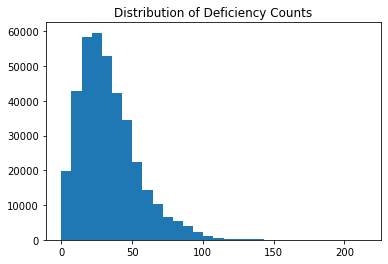

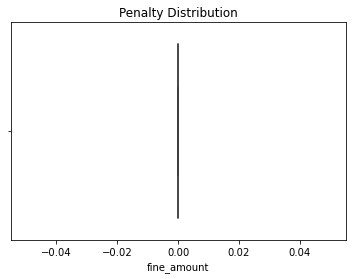

In [67]:
import matplotlib.pyplot as plt

# Plot the distribution of deficiency counts
plt.hist(merged_df['deficiency_count'], bins=30)
plt.title('Distribution of Deficiency Counts')
plt.show()

# Plot the penalty distribution
sns.boxplot(x='fine_amount', data=merged_df)
plt.title('Penalty Distribution')
plt.show()



In [70]:
print(merged_df['penalized'].value_counts())


1    378399
Name: penalized, dtype: int64


In [71]:
print(merged_df[merged_df['fine_amount'].isnull()])


Empty DataFrame
Columns: [provnum, PROVNAME_x, ADDRESS_x, CITY_x, STATE_x, ZIP_x, PHONE, COUNTY_SSA, COUNTY_NAME, OWNERSHIP, BEDCERT, RESTOT, CERTIFICATION, INHOSP, LBN, PARTICIPATION_DATE, CCRC_FACIL, SFF, OLDSURVEY, CHOW_LAST_12MOS, resfamcouncil, sprinkler_status, overall_rating, overall_rating_fn, survey_rating, survey_rating_fn, quality_rating, quality_rating_fn, staffing_rating, staffing_rating_fn, RN_staffing_rating, rn_staffing_rating_fn, STAFFING_FLAG, PT_STAFFING_FLAG, AIDHRD, VOCHRD, RNHRD, TOTLICHRD, TOTHRD, PTHRD, exp_aide, exp_lpn, exp_rn, exp_total, adj_aide, adj_lpn, adj_rn, adj_total, cycle_1_defs, cycle_1_nfromdefs, cycle_1_nfromcomp, cycle_1_defs_score, CYCLE_1_SURVEY_DATE, CYCLE_1_NUMREVIS, CYCLE_1_REVISIT_SCORE, CYCLE_1_TOTAL_SCORE, cycle_2_defs, cycle_2_nfromdefs, cycle_2_nfromcomp, cycle_2_defs_score, CYCLE_2_SURVEY_DATE, CYCLE_2_NUMREVIS, CYCLE_2_REVISIT_SCORE, CYCLE_2_TOTAL_SCORE, cycle_3_defs, cycle_3_nfromdefs, cycle_3_nfromcomp, cycle_3_defs_score, CYCLE_3_S

In [72]:
# Introduce a small number of synthetic 'non-penalized' rows
non_penalized_data = merged_df.sample(1000, random_state=42)  # Select 1000 random rows to convert
non_penalized_data['penalized'] = 0  # Set their 'penalized' column to 0

# Append these rows to the original dataset
merged_df_balanced = pd.concat([merged_df, non_penalized_data])

# Now you can proceed with training the model on the new dataset
X = merged_df_balanced[['deficiency_count']].fillna(0)
y = merged_df_balanced['penalized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with class weights balanced
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict on the test set
preds = model.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))




[[   69   142]
 [32032 43637]]
              precision    recall  f1-score   support

           0       0.00      0.33      0.00       211
           1       1.00      0.58      0.73     75669

    accuracy                           0.58     75880
   macro avg       0.50      0.45      0.37     75880
weighted avg       0.99      0.58      0.73     75880



In [ ]:
# Here's the markdown for Cell 8 – Summary & Takeaways: